In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline
from numpy import loadtxt
from urllib.request import urlopen

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB

##from mlxtend.feature_selection import SequentialFeatureSelector as sfs
##from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
##from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#Model selection Library
from sklearn import model_selection

import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
bnkrupcy_df = pd.read_csv("Qualitative_Bankruptcy.txt", names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

In [5]:
bnkrupcy_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [6]:
bnkrupcy_df.shape

(250, 7)

In [7]:
for col in bnkrupcy_df:
    print (col)
    print (bnkrupcy_df[col].unique())

Industrial Risk
['P' 'N' 'A']
Management Risk
['P' 'N' 'A']
Financial Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


In [8]:
bnkrupcy_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [9]:
var1=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

In [10]:
def func_labelEncoder(var1,features):
    encode= LabelEncoder()
    features[var1] = encode.fit_transform(features[var1].astype(str))
    
for i in var1:
    func_labelEncoder(i,bnkrupcy_df)

In [11]:
bnkrupcy_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [12]:
bnkrupcy_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [13]:
bnkrupcy_df.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

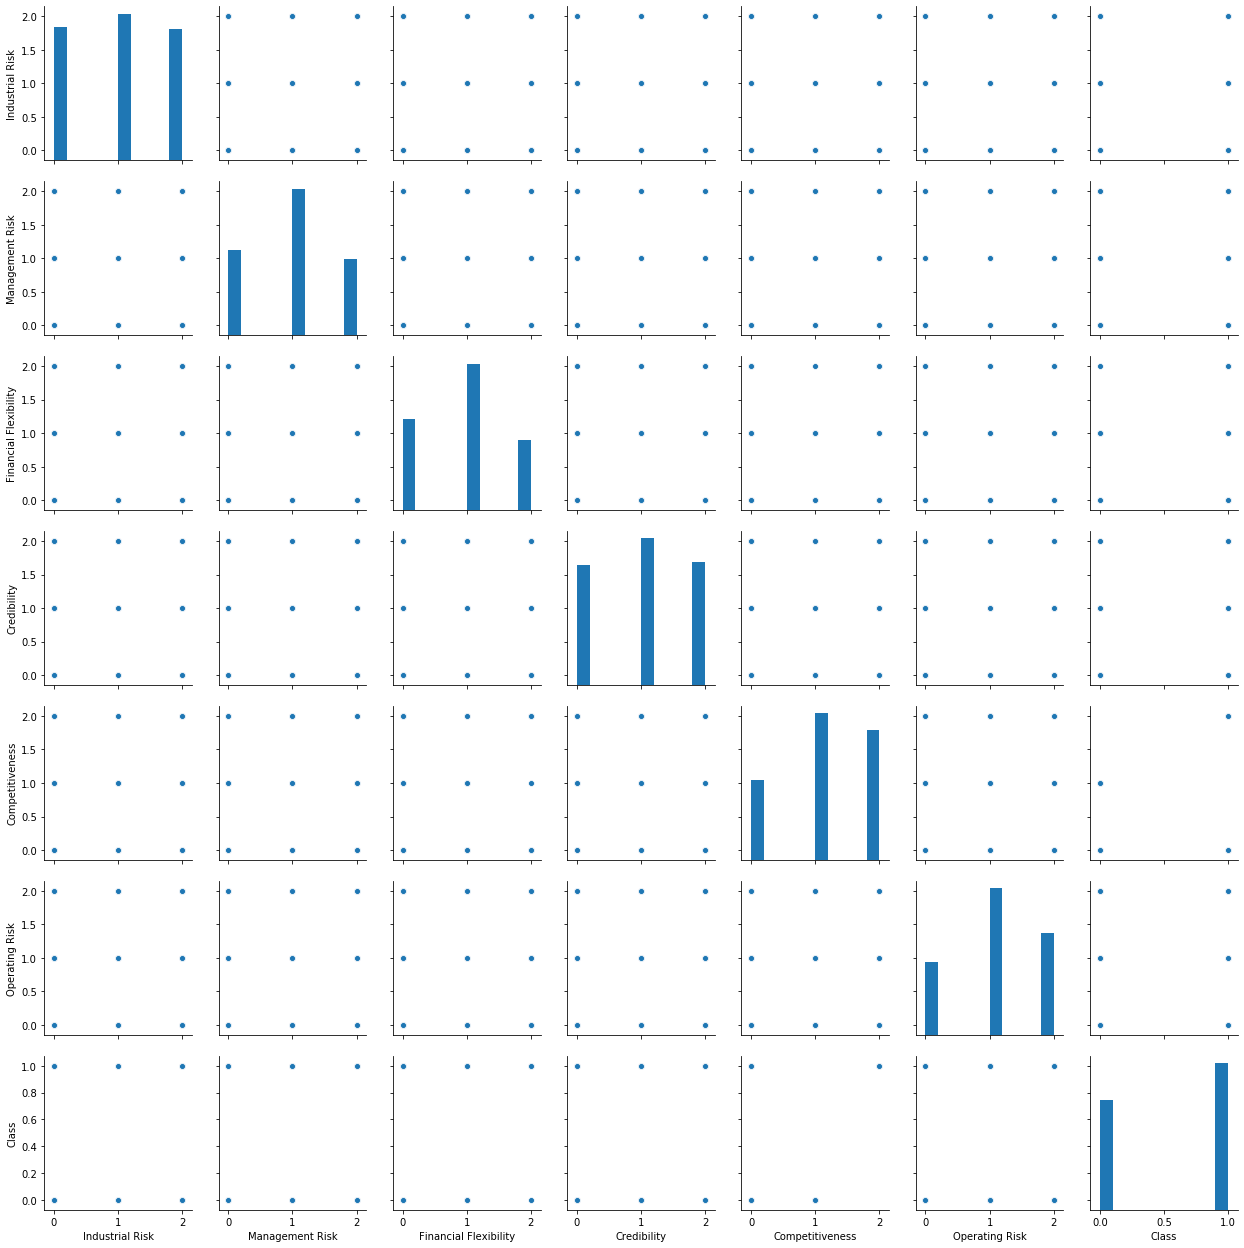

In [14]:
sns.pairplot(bnkrupcy_df)

In [15]:
bnkrupcy_df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


In [16]:
bnkrupcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null int32
Management Risk          250 non-null int32
Financial Flexibility    250 non-null int32
Credibility              250 non-null int32
Competitiveness          250 non-null int32
Operating Risk           250 non-null int32
Class                    250 non-null int32
dtypes: int32(7)
memory usage: 6.9 KB


In [17]:
bnkrupcy_df.skew()

Industrial Risk          0.007257
Management Risk          0.042458
Financial Flexibility    0.102854
Credibility             -0.014238
Competitiveness         -0.238223
Operating Risk          -0.138990
Class                   -0.292793
dtype: float64

In [19]:
bnkrupcy_df['Class'].unique()

array([1, 0], dtype=int64)

In [20]:
bnkrupcy_df['Class'].value_counts()

1    143
0    107
Name: Class, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering

In [23]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [25]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [26]:
X,y = np.array(bnkrupcy_df)[ :, 0:5], np.array(bnkrupcy_df.Class)[:]

In [29]:
bnkrupcy_df2 = bnkrupcy_df.loc[:, 'Industrial Risk':'Operating Risk']

In [30]:
bnkrupcy_df2.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [31]:
df_scaled = bnkrupcy_df2.apply(zscore)

In [32]:
df_scaled.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1.251112,1.421192,-1.293228,-1.276117,-1.512091,1.24540
1,0.004985,0.038709,-1.293228,-1.276117,-1.512091,-0.12017
2,-1.241143,-1.343773,-1.293228,-1.276117,-1.512091,-1.48574
3,1.251112,1.421192,1.481939,1.255861,1.140700,1.24540
4,0.004985,0.038709,1.481939,1.255861,1.140700,-0.12017


In [34]:
xvar = bnkrupcy_df.drop(['Class'], axis = 1)

In [36]:
xvar.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [37]:
yvar = bnkrupcy_df.Class.values.reshape(-1,1)

In [43]:
yvar.shape

(250, 1)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(xvar,yvar, test_size=0.2, random_state=42)

In [45]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)

X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200, 1)
X_test shape: (50, 1)


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score

In [48]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00401606  0.11050499  0.06896979 -0.05063474  0.06067116]
 [ 0.11050499  1.00401606 -0.01907523 -0.00663532 -0.13270519]
 [ 0.06896979 -0.01907523  1.00401606 -0.02020518  0.1506388 ]
 [-0.05063474 -0.00663532 -0.02020518  1.00401606  0.0925247 ]
 [ 0.06067116 -0.13270519  0.1506388   0.0925247   1.00401606]]


In [49]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.36930151 -0.08604908 -0.71559376 -0.56700141  0.15048896]
 [-0.48866553  0.42169119 -0.49528328  0.36329513  0.45397539]
 [ 0.2878828  -0.51035592 -0.37776718  0.69317717 -0.18291445]
 [ 0.33335511 -0.23607281  0.31350209  0.08372233  0.85314185]
 [-0.656369   -0.70610095 -0.04035403 -0.24294449  0.09975325]]

 Eigen Values 
%s [0.75801983 1.23047558 1.14251395 0.88236694 1.00670403]


In [50]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.230475578465984, array([-0.08604908,  0.42169119, -0.51035592, -0.23607281, -0.70610095])), (1.1425139471176804, array([-0.71559376, -0.49528328, -0.37776718,  0.31350209, -0.04035403])), (1.0067040309142343, array([ 0.15048896,  0.45397539, -0.18291445,  0.85314185,  0.09975325])), (0.8823669372946529, array([-0.56700141,  0.36329513,  0.69317717,  0.08372233, -0.24294449])), (0.7580198274925898, array([ 0.36930151, -0.48866553,  0.2878828 ,  0.33335511, -0.656369  ]))]
Eigenvalues in descending order: 
[1.230475578465984, 1.1425139471176804, 1.0067040309142343, 0.8823669372946529, 0.7580198274925898]


In [52]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)  


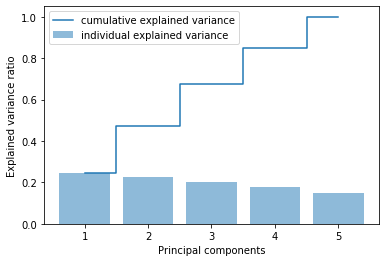

In [56]:
plt.bar(range(1,6), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,6),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'Class')
plt.show()

In [57]:
P_reduce = np.array(eigvectors_sorted[0:6])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

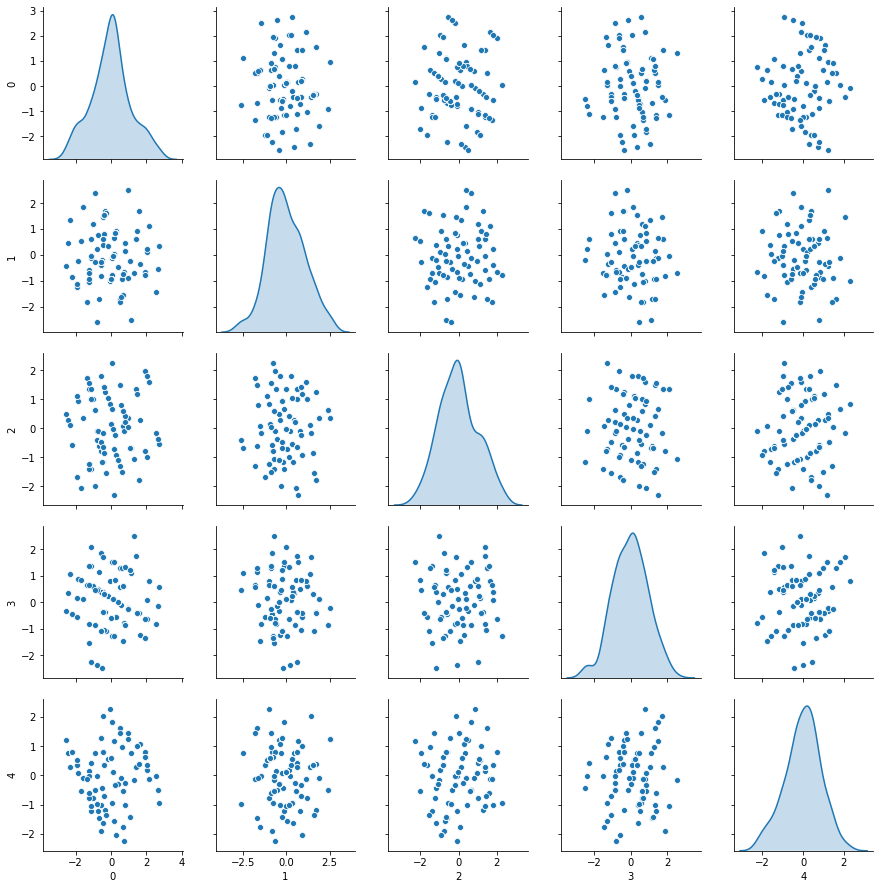

In [58]:
sns.pairplot(Proj_data_df, diag_kind='kde')

In [60]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

regression_model.coef_

array([[-0.04082901,  0.07343847, -0.04146833,  0.06250686,  0.12808478,
         0.07603132]])

In [61]:
regression_model.intercept_

array([0.28864607])

In [63]:
regression_model.score(X_test, Y_test)

0.16503144116713908

In [64]:
cluster_errors = []


In [65]:
cluster_range = range( 1, 11 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,1500.000000
1,2,1277.365329
2,3,1130.911225
3,4,1019.672999
4,5,927.771459
5,6,873.184994
6,7,812.170544
7,8,763.845080
8,9,701.886581
9,10,668.002277


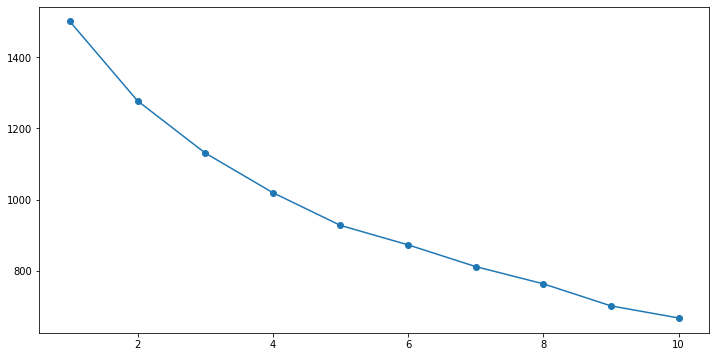

In [66]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [67]:
kmeans = KMeans(n_clusters=4, n_init = 10, random_state=2)

In [68]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [69]:
centroids=kmeans.cluster_centers_

In [71]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled))

In [72]:
centroid_df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,0.458122,0.321490,1.387331,0.335142,0.839246,0.159151
1,-0.856309,-0.591540,-0.007673,-0.065980,-0.010143,-0.983692
2,0.424599,0.137458,-0.245461,-0.604368,-0.334576,0.269993
3,-0.088475,0.315206,-0.911642,1.224211,-0.086216,0.835729


In [73]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [74]:
kmeans.labels_

array([2, 2, 1, 0, 0, 1, 3, 2, 3, 2, 0, 0, 3, 2, 3, 3, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 3, 2, 3, 2, 0, 0, 1, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 3, 0, 2, 0, 0, 1, 3, 3, 1, 0, 3,
       0, 2, 0, 0, 3, 3, 0, 2, 2, 3, 3, 3, 1, 3, 2, 3, 0, 2, 2, 3, 0, 2,
       0, 1, 3, 3, 1, 3, 0, 0, 0, 3, 3, 0, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2,
       1, 0, 0, 1, 3, 2, 3, 2, 0, 0, 3, 2, 3, 3, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 3, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 2])

In [85]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['group']))

df_labels['group'] = df_labels['group'].astype('category')

In [86]:
anninc_df_labeled = df_scaled.join(df_labels)

In [87]:
anninc_clusters = anninc_df_labeled.groupby(['group'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=anninc_clusters.get_group(0)
df1=anninc_clusters.get_group(1)
df2=anninc_clusters.get_group(2)
df3=anninc_clusters.get_group(3)

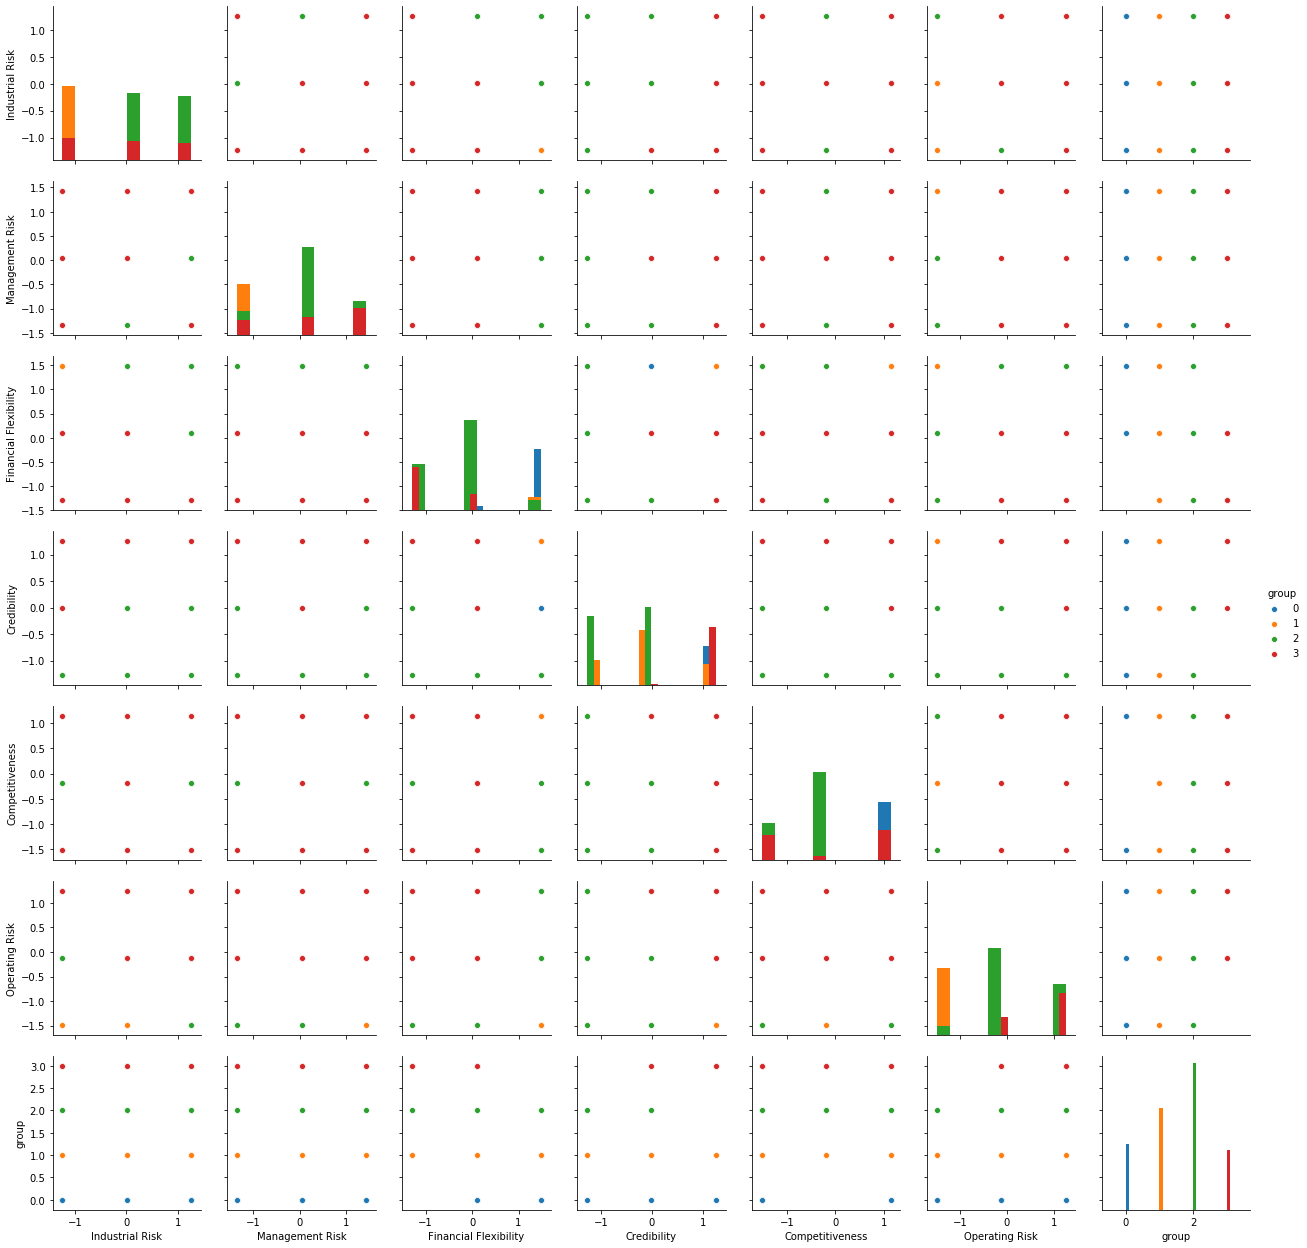

In [88]:
finaldf = pd.concat([df0,df1,df2,df3])
sns.pairplot(finaldf, diag_kind='hist',hue ='group')

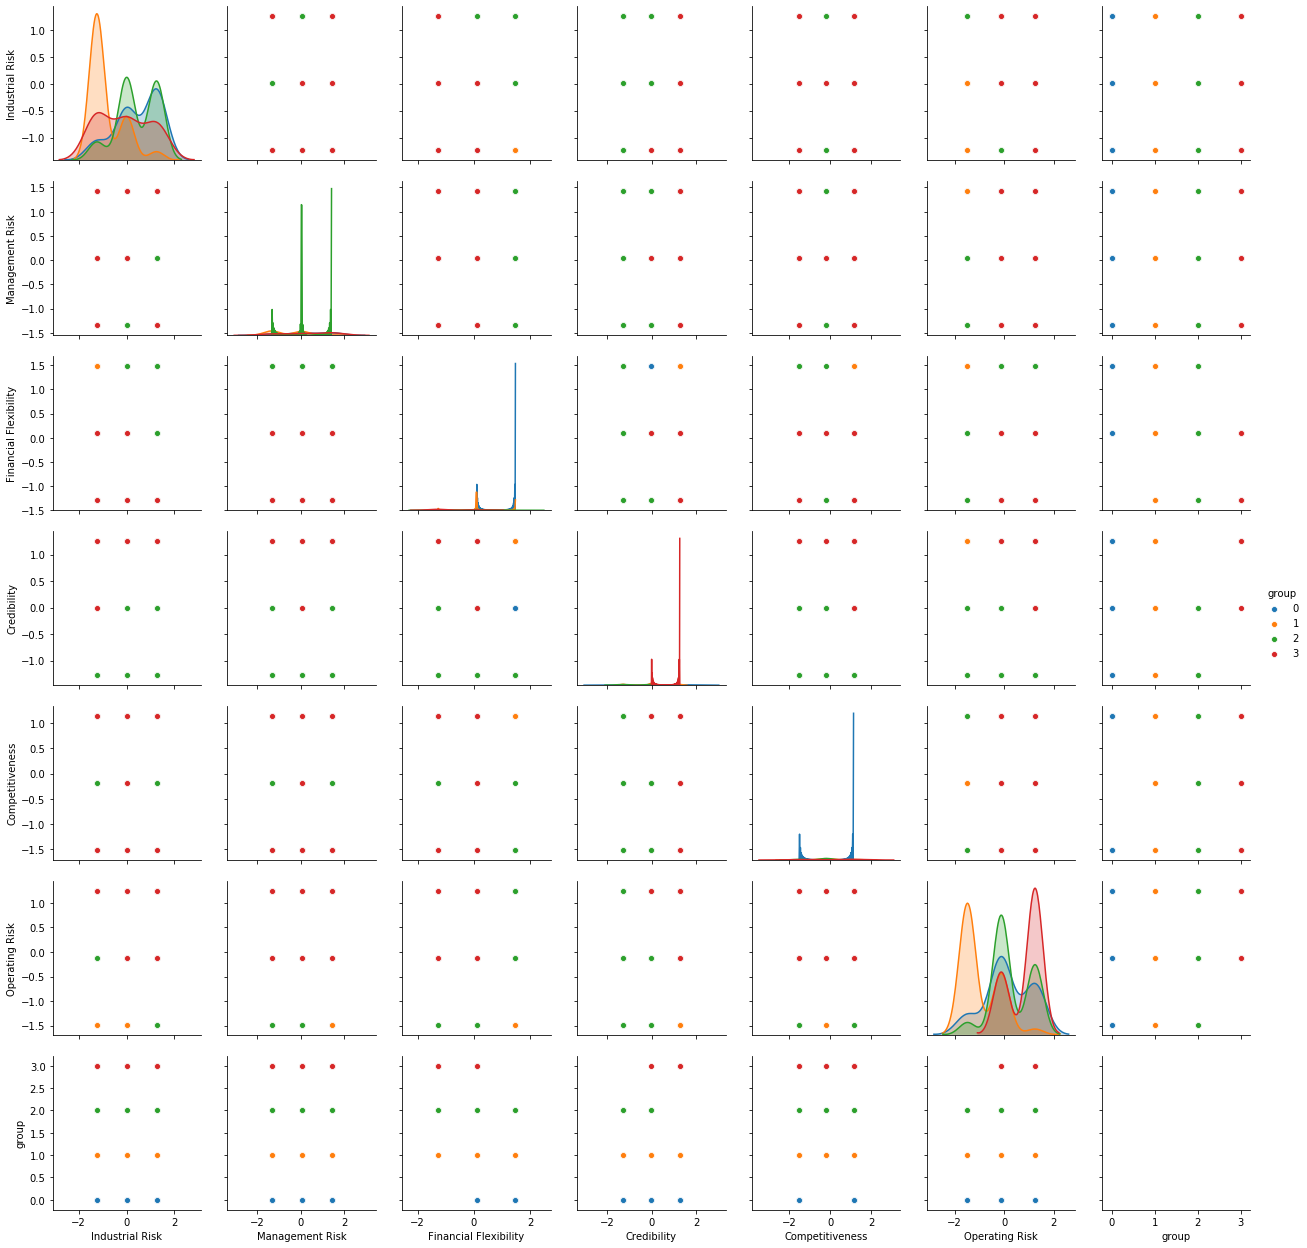

In [89]:
finaldf = pd.concat([df0,df1,df2,df3])
sns.pairplot(finaldf, diag_kind='kde',hue ='group')

In [90]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [93]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 

In [94]:
clf.fit(X_train , Y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
y_pred = clf.predict(X_test)

In [96]:
type(y_pred)

numpy.ndarray

In [98]:
type(Y_train)

numpy.ndarray

In [100]:
y_pred


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1])

In [104]:
getAccuracy(Y_test , y_pred) 

100.0

In [106]:
y_grid = (np.column_stack([Y_test, y_pred]))

In [107]:
print(y_grid)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


In [115]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]
c3=kmeans.cluster_centers_[3,:]


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.1394276544560284


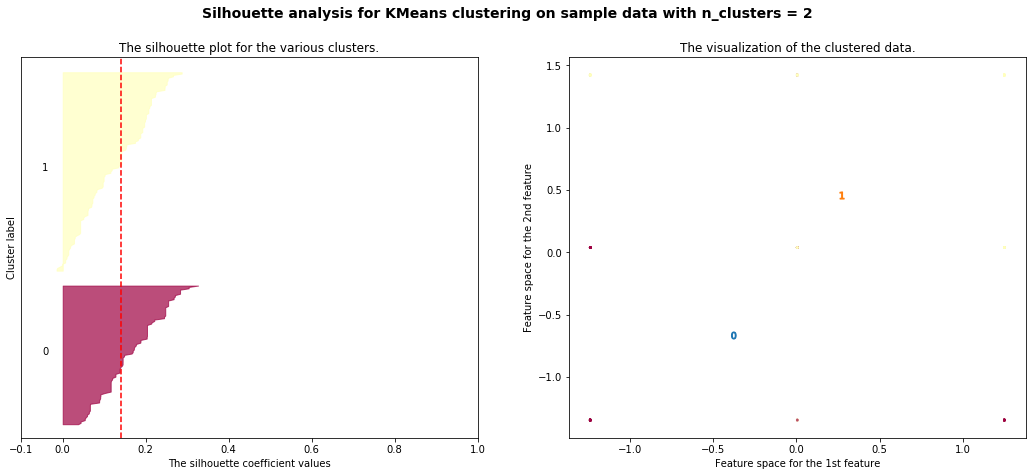

For n_clusters = 3 The average silhouette_score is : 0.14838887724702102


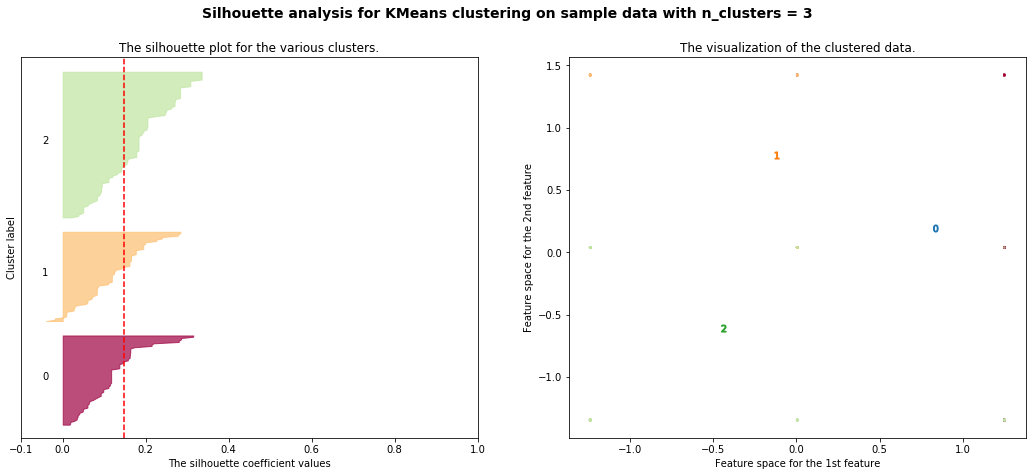

For n_clusters = 4 The average silhouette_score is : 0.1561367674830717


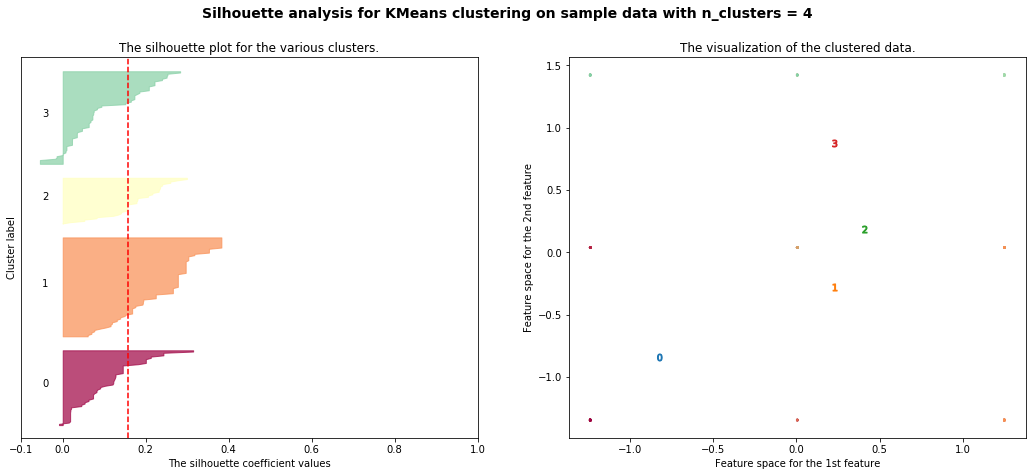

For n_clusters = 5 The average silhouette_score is : 0.1726859746196517


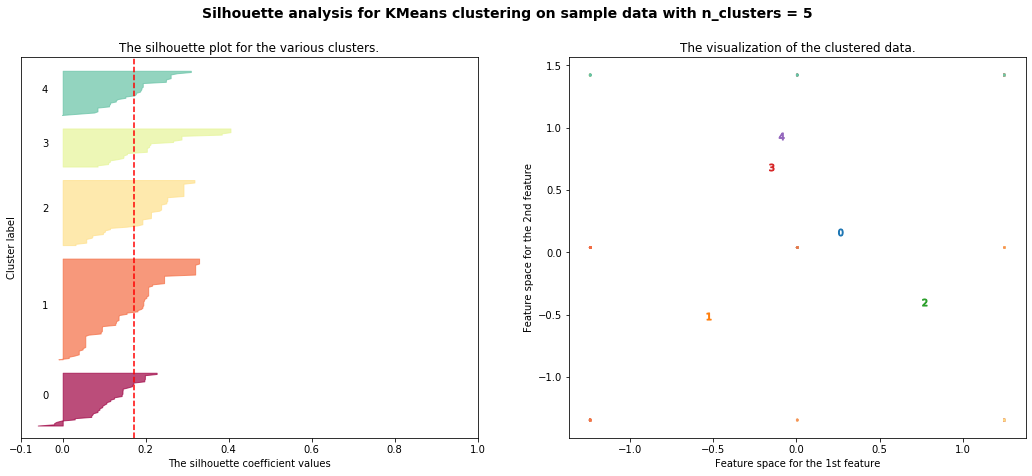

For n_clusters = 6 The average silhouette_score is : 0.18172909217377206


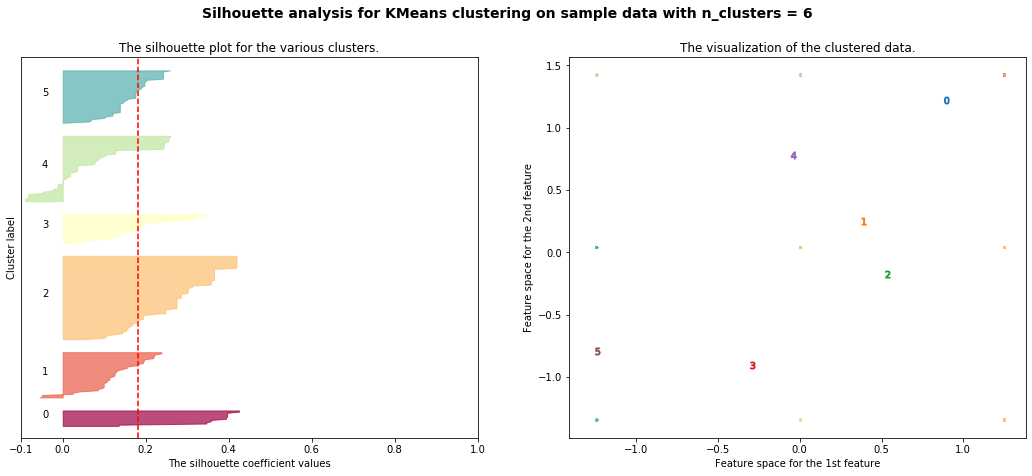

In [116]:
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [117]:
from sklearn.cluster import AgglomerativeClustering

In [118]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='ward')

In [119]:
model2.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [120]:
model2.labels_

array([3, 3, 0, 2, 2, 4, 1, 0, 3, 1, 0, 2, 1, 0, 3, 3, 1, 0, 2, 4, 0, 0,
       1, 0, 1, 3, 3, 3, 2, 2, 2, 1, 0, 3, 1, 0, 2, 4, 0, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 4, 4, 2, 3, 2, 2, 4, 4, 1, 4, 2, 4,
       2, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 3, 1, 3, 1, 3, 2, 1, 3, 1, 2, 3,
       2, 4, 4, 1, 4, 4, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       0, 2, 2, 4, 1, 0, 3, 1, 0, 2, 1, 0, 3, 3, 1, 0, 2, 4, 0, 0, 1, 0,
       1, 3, 3, 3, 2, 2, 2, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4,
       4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

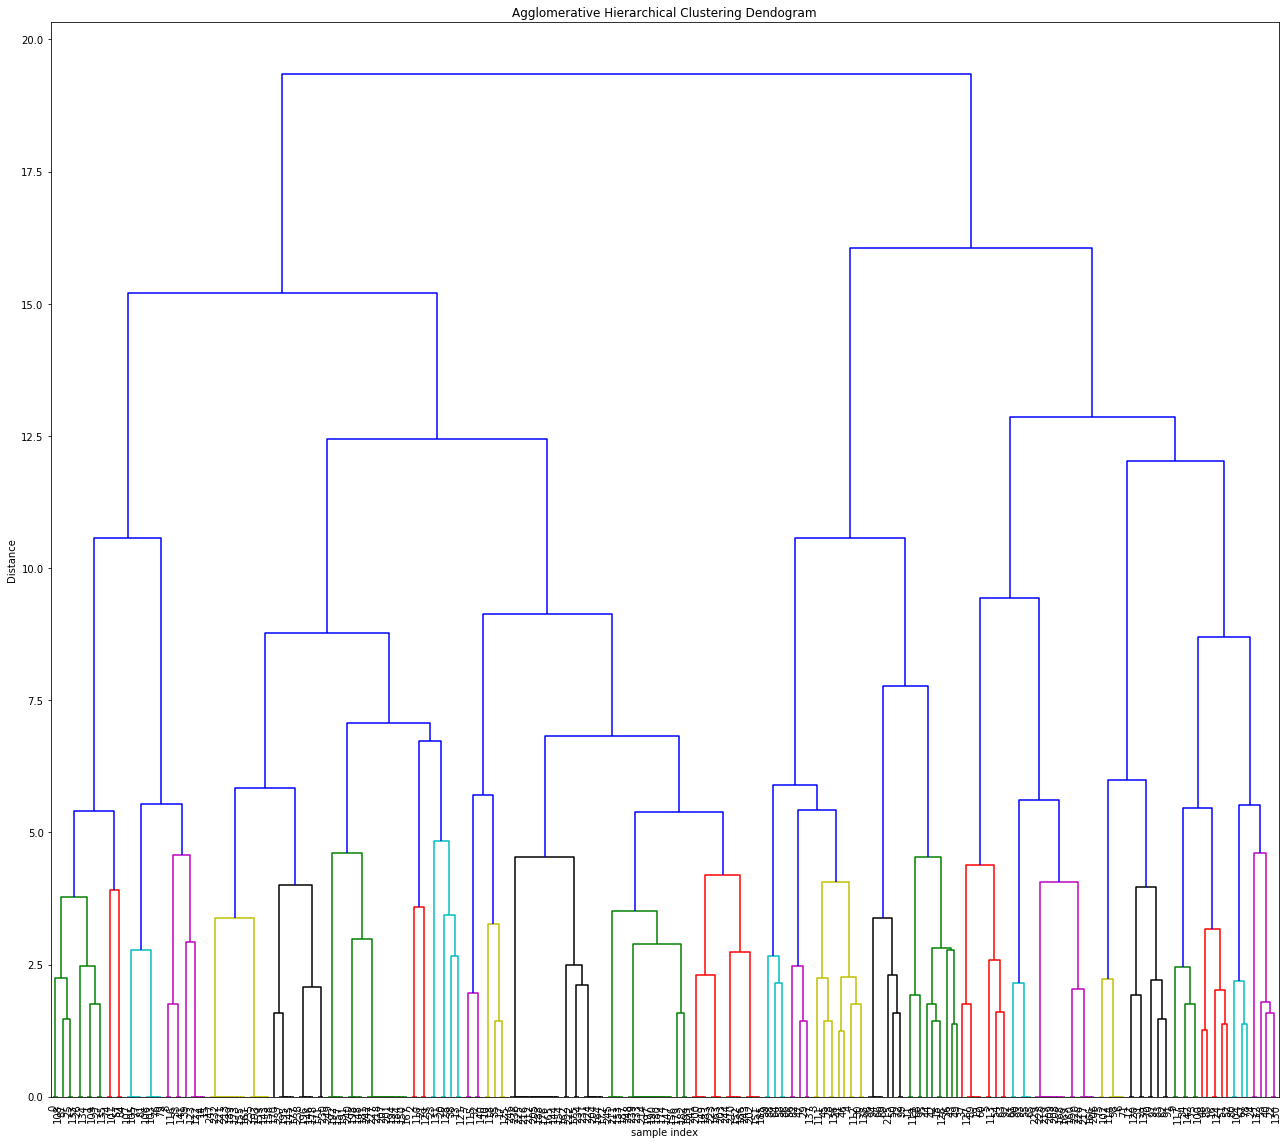

In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [125]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 3, min_samples_leaf=5 )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [126]:
y_predict = dt_model.predict(X_test)

In [127]:
print(metrics.confusion_matrix(Y_test, y_predict))

[[21  0]
 [ 0 29]]


In [129]:
from sklearn import linear_model as lm
lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=0.0001,multi_class='ovr')

In [131]:
lrmod = lmod.fit(X_train,Y_train.ravel())

In [132]:
lrmod.intercept_

array([-0.89782944])

In [134]:
lrmod.coef_

array([[-0.16351577,  0.30790269, -0.17435897,  0.2731382 ,  0.53710566,
         0.32286241]])

In [135]:
predicted_data = lrmod.predict(X_test)

In [136]:
predicted_data

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0])

In [137]:
confusion_matrix(Y_test, predicted_data)

array([[ 7, 14],
       [ 5, 24]], dtype=int64)

In [139]:
from sklearn import metrics as accuracyMatrics

In [140]:
accuracyMatrics.accuracy_score(Y_test, predicted_data)

0.62

In [141]:
prec = accuracyMatrics.precision_score(Y_test, predicted_data)  ## Precision score
prec

0.631578947368421

In [143]:
recall = accuracyMatrics.recall_score(Y_test, predicted_data)  ## Recall score
recall

0.8275862068965517

In [144]:
probPred = lrmod.predict_proba(X_test)
predictProbAdmit = probPred[:,1]

In [146]:
fpr, tpr, threshold = accuracyMatrics.roc_curve(Y_test,predictProbAdmit)

In [147]:
auc_val = accuracyMatrics.auc(fpr,tpr)
auc_val

0.7536945812807883

In [148]:
threshold

array([1.83985599, 0.83985599, 0.69871571, 0.67319212, 0.65557384,
       0.62555808, 0.60809226, 0.59117395, 0.57319855, 0.56341392,
       0.55829066, 0.55114667, 0.52889185, 0.52413947, 0.51148751,
       0.51044573, 0.49946344, 0.47064439, 0.4570223 , 0.43386143,
       0.43260431, 0.4035498 , 0.35686982, 0.34734231])

Text(0.5, 1.0, 'Receiver operating characteristic example')

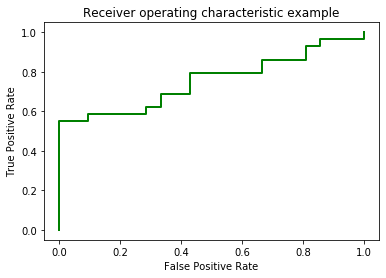

In [149]:

plt.plot(fpr,tpr,linewidth=2, color='g',label='ROC curve (area = %0.2f)' % auc_val)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

In [152]:
from sklearn.metrics import f1_score
F1_score = f1_score(Y_test, predicted_data)
F1_score


0.716417910447761